In [2]:
# 导入TensorFlow和tf.keras
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from keras.layers import *
from keras.models import *
from keras.preprocessing.image import ImageDataGenerator
# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

# 导入数据，并转化形状

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train[0].shape)


(28, 28)


In [7]:
X_train = x_train.reshape(-1, 28, 28, 1)
X_test = x_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# 构造模型

In [8]:
inputs = Input((28, 28 , 1))
x = inputs

x = Conv2D(32, (5, 5), padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(64, (5,5), padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(100, activation='sigmoid')(x)
x = Dense(10, activation='sigmoid')(x)

model = Model(inputs, x)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               313700    
__________

# 训练

In [9]:
# 训练中的信息保存到h
h = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 273us/step - loss: 0.1723 - acc: 0.9606 - val_loss: 0.0454 - val_acc: 0.9881
Epoch 2/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.0370 - acc: 0.9893 - val_loss: 0.0343 - val_acc: 0.9893
Epoch 3/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.0237 - acc: 0.9935 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 13s 222us/step - loss: 0.0175 - acc: 0.9947 - val_loss: 0.0272 - val_acc: 0.9910
Epoch 5/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0125 - acc: 0.9963 - val_loss: 0.0289 - val_acc: 0.9908


# 保存模型文件

In [10]:
model.save("minist_cnn.h5")

# 画loss与acc趋势图

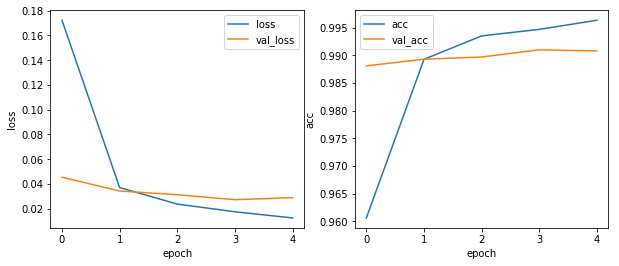

In [11]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')

plt.show()

# 测试一张图片看看

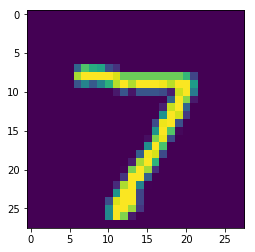

In [13]:
# 从测试数据集中获取图像
img = X_test[0]

plt.figure()
plt.imshow(x_test[0])
plt.show()

In [14]:
print(img.shape)
# 将图像添加到批次中，即使它是唯一的成员。
img = (np.expand_dims(img,0))
print(img.shape)

(28, 28, 1)
(1, 28, 28, 1)


# 预测并打印结果

In [16]:
predictions_single = model.predict(img)

print(predictions_single)

prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

[[2.7377786e-07 2.8252557e-06 6.9335001e-06 6.8587178e-06 1.0193457e-06
  1.7528001e-07 5.2183807e-08 5.2951282e-01 1.2570797e-07 1.7676761e-05]]
7
